## 1. Project Title: Machine Learning for Jewellry Price Optimization

This project aims to successfully predict the prices of jewellry pieces. This will allow the jewelry company reduce their dependence on gemolosists and expensive experts.

---

## 2. Methodology

This project will be carried out using the __CRISP-DM__ methodology. This is one of the more popular data science methodologies and is characterized by six important phases, which are as follows:

1. _Business Understanding_,
2. _Data Understanding_,
3. _Data Preparation_,
4. _Data Modelling_,
5. _Model Evaluation_, and
6. _Model Deployment_.

It should be noted that these phases are usually recurrent in nature (i.e., some phases may be repeated). As such, they do not necessarily follow a linear progression.

---

## 3. Tools

The tools of use for this project include:

1. _Pandas_
2. _NumPy_
3. _Matplotlib_ & _Seaborn_

#### 3.1. Pandas & NumPy

__Pandas__ is a Python library built upon the __NumPy__ library. The idea behind _Pandas_ is to be able to operate on text data, where _NumPy_ is best suited for numerical operations, irrespective of the fact that it can represent text to some degree.

#### 3.2. Matplotlib & Seaborn

__Matplotlib__ and __Seaborn__ are Python libraries for data visualization. Other alternatives include __Bokeh__ and __Plotly__.

---

<div align="center"><h1>Project Implementation via CRISP-DM</h1></div>

---

<div><h3>01. Business Understanding</h3></div>


__Gemineye Emporium__ is a boutique jewelry store based in New York City, U.S., specializing in the sale of high-quality jewelry, in both gemstones and precious metals. They are dedicated to providing customers with exquisite pieces within a market as competitive as the jewelry market.

Specifically, with all the hype about AI and ML, they are interested in leveraging the tools for predicting their jewelery prices. This will be advantageous in optimizing their prices for market, without the need for employing expensive gemologists and certified appraisers.

In order to train the needed machine learning models, the IT team at Gemineye Emporium will need data that records and describes the conditions and state of different jewellery pieces, such as the target gender of the piece, the metal the piece is made of, the gem mounted on the piece, amongst others.

---

<div><h3>02. Data Understanding</h3></div>

With the _**Business Understanding**_ out of the way, the next step is to understand the data to be obtained and used for the task. This will involve the process of __*Exploratory Data Analysis (EDA)*__.

EDA is the process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what can be done with it. They can also be used for guided preparation of the dataset in the appropriate manner. Just like regular analysis, EDA begins with a set of __questions__ and/or __hypotheses__. The EDA process will then prove or disprove these hypotheses, and hopefully, reveal other points of inquiry along the way.

The required libraries and packages are imported first. The EDA process is carried out here as shown below. The high-level steps to follow are:

1. Import the required libraries
2. Load in the dataset
3. Analyze and observe its properties.
   * Missing data
   * Inconsistent values
   * Low categorical cardinality
   * Feature correlations
4. Report on these properties and how they might affect our final solution.

<div align="center"><h3>2.1. Enter EDA Code Here</h3></div>

In [10]:
# Import required utilities
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.neighbors import LocalOutlierFactor

In [11]:
# Seed for reproducibility
SEED = np.random.seed(seed = 2023)

In [12]:
# Import the dataset
data = pd.read_csv("Jewelry_Dataset.csv")
data.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "USD_Price",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem"
]

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

##### Cardinality

In [15]:
# Feature cardinality
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
USD_Price          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [16]:
data.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,USD_Price,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


#### Data summary

In [18]:
# Describe data
data.describe(include="all")

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,USD_Price,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
count,95910,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,85977,9.112500e+04,90558.000000,9.055800e+04,47743,88250,90448,61852
unique,74504,NaN,NaN,NaN,NaN,218,NaN,NaN,NaN,2,5,3,30
top,2020-10-17 12:58:28 UTC,NaN,NaN,NaN,NaN,jewelry.earring,NaN,NaN,NaN,f,red,gold,diamond
freq,26,NaN,NaN,NaN,NaN,29051,NaN,NaN,NaN,47379,69510,89081,29609
mean,NaN,2.485191e+18,1.815970e+18,1.0,1.805947e+18,NaN,8.891036e+16,362.213017,1.512644e+18,NaN,NaN,NaN,NaN
std,NaN,1.934750e+17,2.136814e+17,0.0,2.083954e+16,NaN,3.559651e+17,444.157665,2.374776e+16,NaN,NaN,NaN,NaN
min,NaN,1.924899e+18,1.313551e+18,1.0,1.313678e+18,NaN,0.000000e+00,0.990000,1.313554e+18,NaN,NaN,NaN,NaN
25%,NaN,2.379732e+18,1.515966e+18,1.0,1.806829e+18,NaN,0.000000e+00,145.620000,1.515916e+18,NaN,NaN,NaN,NaN
50%,NaN,2.524282e+18,1.956664e+18,1.0,1.806829e+18,NaN,1.000000e+00,258.770000,1.515916e+18,NaN,NaN,NaN,NaN
75%,NaN,2.644347e+18,1.956664e+18,1.0,1.806829e+18,NaN,1.000000e+00,431.370000,1.515916e+18,NaN,NaN,NaN,NaN


##### Missing Values

In [20]:
# Check for missing values
100 * data.isnull().sum() / len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
USD_Price          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [21]:
print(data.shape)

(95910, 13)


##### Low cardinality

In [23]:
# Number of unique values per feature
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
USD_Price          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

Apart from the target variable, which is the jewelry price, all other variables may be considered categorical in nature. Also, the _SKU_Quantity_ feature has just one unique value, giving it a variance of 0. As such, it conferrs no new informative property on the dataset.

##### Duplicate records

We eliminate duplicated rows.

In [26]:
# Get the duplicated records
num_duplicated = len(data.loc[data.duplicated()])

In [27]:
print(f"Number of duplicated records: {num_duplicated}.")

Number of duplicated records: 2589.


In [28]:
# Filter away the duplicated records
data = data.loc[~data.duplicated()]

##### Target Distribution

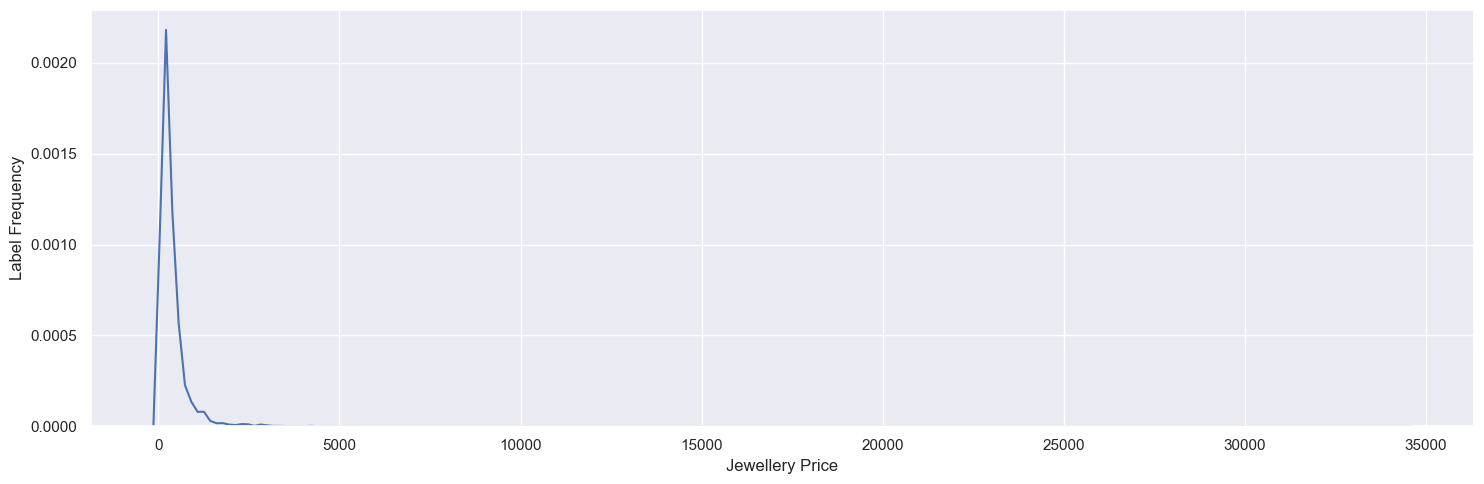

In [30]:
# Bar chart
plt.figure(figsize = (15, 5))
sns.kdeplot(data = data, x = "USD_Price")
plt.xlabel("Jewellery Price")
plt.ylabel("Label Frequency")

plt.tight_layout()
plt.show()

The jewelry prices, which are the target labels, are right-skewed i.e., most outliers exist on the high end. This may imply that most jewelry pieces are sold to  more regular, mainstream buyers, while high-value sales are rarely conducted.

##### Target Gender Analysis

According to social norms, females are more likely to be interested in jewelry than their male counterparts [[PAPER](https://www.jcreview.com/admin/Uploads/Files/61ded785882d06.51262907.pdf)], and this skew can be very extreme. It can be interesting to see how this might reflect in this dataset.

In [33]:
# Jewelry target gender distribution
data["Target_Gender"].value_counts()

Target_Gender
f    46687
m      359
Name: count, dtype: int64

In [34]:
# Jewelry target gender distribution
data["Target_Gender"].value_counts(normalize = True) * 100

Target_Gender
f    99.236917
m     0.763083
Name: proportion, dtype: float64

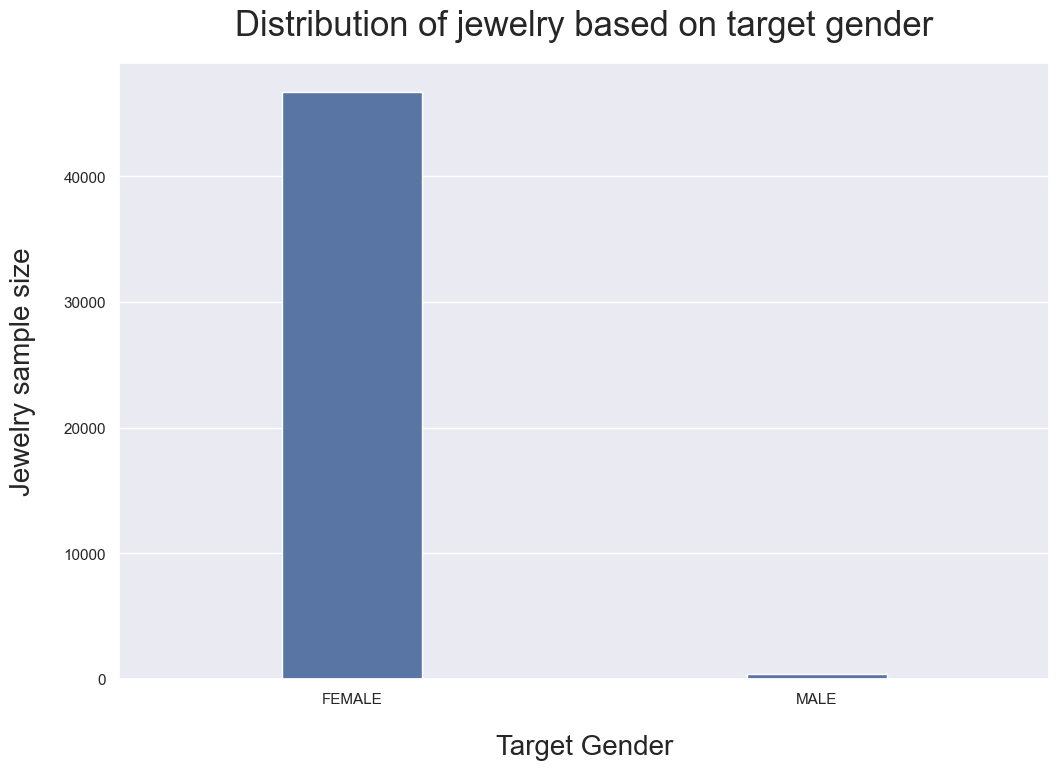

In [35]:
# Visualize jewelry distribution by gender
plt.figure(figsize = (12, 8))

sns.countplot(data=data, x = "Target_Gender", width = 0.3)
plt.title("Distribution of jewelry based on target gender", fontsize=25, pad=20)

plt.xlabel("Target Gender", fontsize=20, labelpad=20)
plt.ylabel("Jewelry sample size", fontsize=20, labelpad=20)

plt.xticks([0, 1], ['FEMALE', 'MALE'])

plt.show(); plt.close("all")

Based on the short univariate analysis above, we can conclude that a majority of jewelry pieces are specifically targeted toward women. This would probably be a result of market analysis.

We can thus assume that the __male__ value in the __Target_Gender__ column is a rare one. This leaves us with one of two options:

1. Retain the column or
2. Eliminate the column, as it does not give us much diversity within gender.

Since this state of affairs is an actual representation of the real-world distribution and how the genders interact with jewelry, the final decision we will make here will be to retain the column.

##### Jewelry Category Analysis

It would make some sense to observe the different jewelry categories on sale.

In [38]:
# Jewelry category distribution
data["Category"].value_counts()

Category
jewelry.earring     29047
jewelry.ring        26025
jewelry.pendant     13083
jewelry.bracelet     6129
0.00                 4311
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [39]:
# Top 10 categories by sample size
data["Category"].value_counts()[:10]

Category
jewelry.earring       29047
jewelry.ring          26025
jewelry.pendant       13083
jewelry.bracelet       6129
0.00                   4311
jewelry.necklace       2335
jewelry.brooch         1286
jewelry.souvenir        170
electronics.clocks      165
40.82                    54
Name: count, dtype: int64

In [40]:
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

From the short analysis done above, it can be seen that a portion of the data has been corrupted. Rather than containing the accurate jewelry categories, some records contain stringified numerical values instead. This may be due to a number of possible issues such as:

1. Corrupted data recording process
2. Lack of accurate data dictionary (these numerical values may encode some information about other jewelry categories)

Also, it was observed that some records did not describe jewelry, they described electronic clocks instead. These records will have to be filtered out. We can also see that the only jewelry item that seems to be targeted towards the men are _rings_.

We can extract the actual jewelry categories of interest.

In [43]:
# Exctract real jewelry categories
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and c.__contains__("jewelry")]

In [44]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [45]:
# Extract records with the real categories
real_categories = data.loc[data["Category"].isin(categories), :]

In [46]:
# Check for missing values
100 * real_categories.isnull().sum() / len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           3.609048
USD_Price          0.000000
User_ID            0.000000
Target_Gender     36.833082
Main_Color         2.009194
Main_Metal         0.092155
Main_Gem          19.378275
dtype: float64

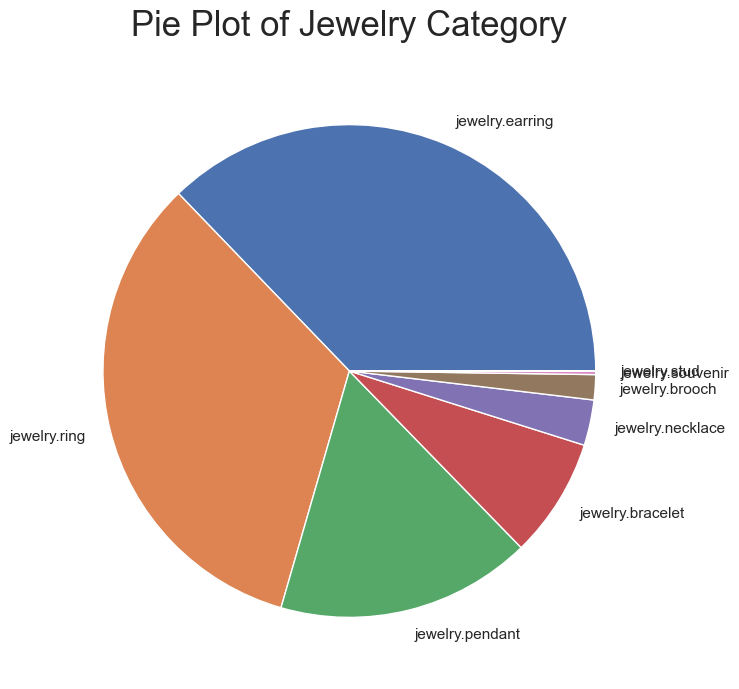

In [47]:
# Visualize the jewelry category via pie chart

jewelry_categories, counts = real_categories["Category"].value_counts().index.tolist(), real_categories["Category"].value_counts().values

plt.figure(figsize = (15, 8))
plt.pie(x=counts, labels=jewelry_categories)

plt.title("Pie Plot of Jewelry Category", fontsize=25, pad=20)

plt.show(); plt.close("all")

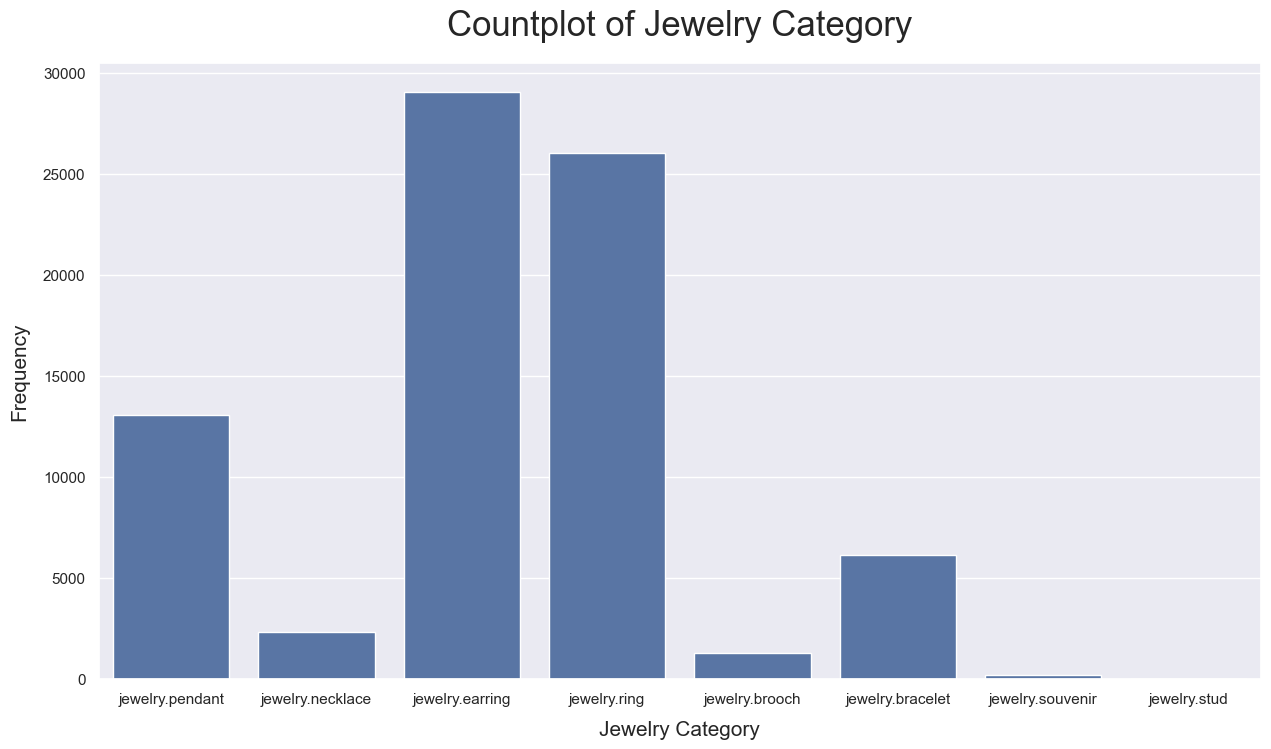

In [48]:
# Visualize the countplot for jewelry category
plt.figure(figsize = (15, 8))
sns.countplot(data=real_categories, x = "Category")

plt.title("Countplot of Jewelry Category", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

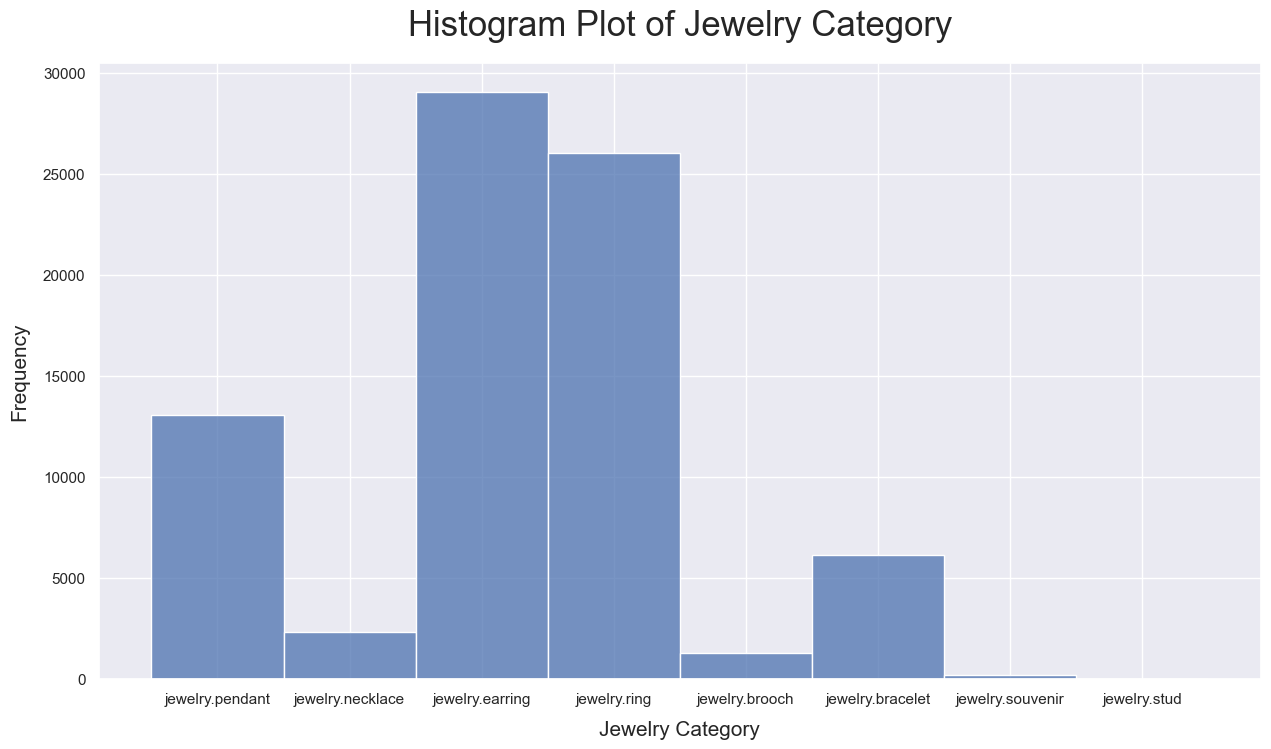

In [49]:
# Visualize the jewelry sample distribution based on jewelry category
plt.figure(figsize = (15, 8))
sns.histplot(data=real_categories, x = "Category")

plt.title("Histogram Plot of Jewelry Category", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

We can also look at a breakdown of the different jewelry categories by target gender.

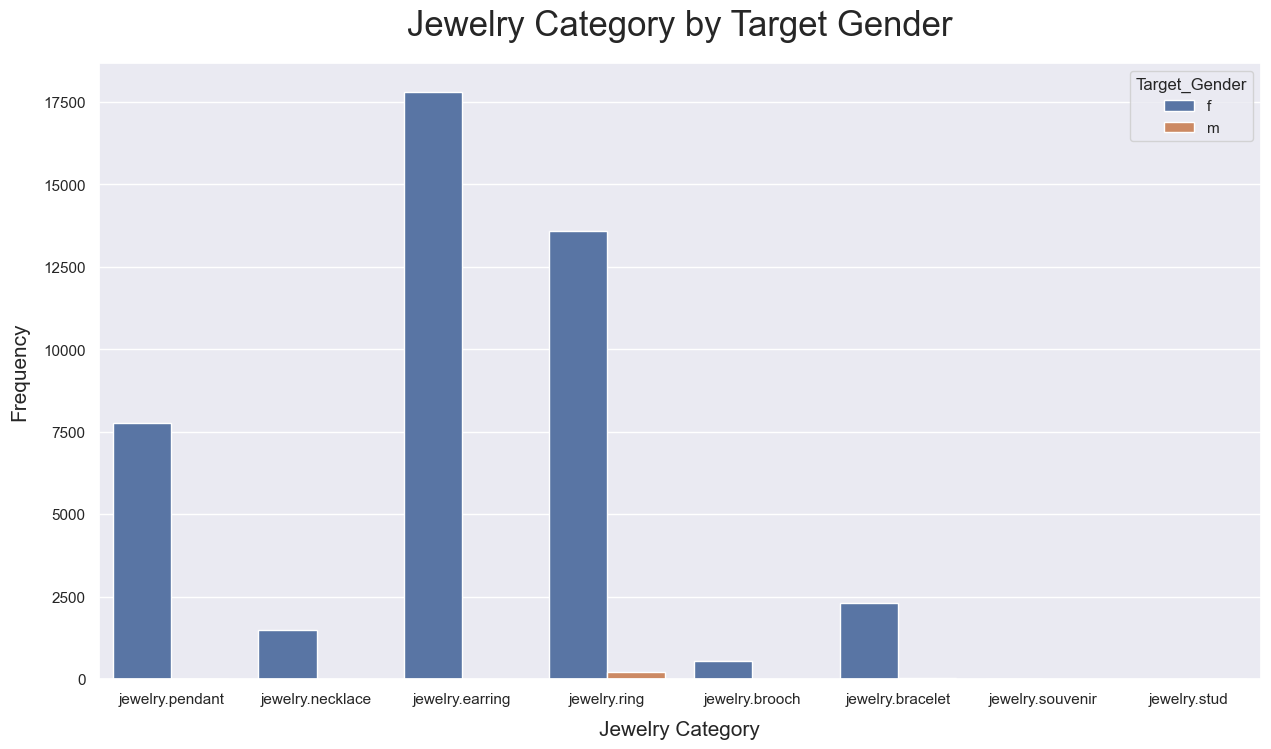

In [51]:
# Jewelry category by gender
plt.figure(figsize = (15, 8))
sns.countplot(data=real_categories, x = "Category", hue = "Target_Gender")

plt.title("Jewelry Category by Target Gender", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

In [52]:
# Jewelry target gender distribution
real_categories["Target_Gender"].value_counts(normalize=True) * 100

Target_Gender
f    99.444114
m     0.555886
Name: proportion, dtype: float64

##### Feature correlation

It would make some sense to observe the features for colinearity. As most of the features in the dataset are categorical, the __Spearman Rank correlation coefficient__ will be utilized.

In [54]:
encoded, category_codes = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [55]:
encoded, category_codes = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [56]:
encoded, category_codes = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

In [57]:
encoded, category_codes = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [58]:
encoded, category_codes = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [59]:
# Obtain Spearman Rank correlation coeficients for all features
correlations = real_categories.drop(["Order_Datetime", "User_ID", "Order_ID"], axis=1).corr("spearman")

In [60]:
correlations

,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,USD_Price,Target_Gender,Main_Color,Main_Metal,Main_Gem
Product_ID,1.000000,NaN,-0.067612,0.045974,-0.167567,-0.005826,-0.174900,0.007825,-0.070714,-0.085904
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,-0.067612,NaN,1.000000,-0.883445,0.102341,-0.304429,0.092612,-0.005701,0.159114,0.029780
Category,0.045974,NaN,-0.883445,1.000000,-0.103630,0.274393,-0.112309,-0.053113,0.106521,-0.064541
Brand_ID,-0.167567,NaN,0.102341,-0.103630,1.000000,-0.024357,0.621894,0.093239,0.002909,0.058302
USD_Price,-0.005826,NaN,-0.304429,0.274393,-0.024357,1.000000,0.046484,0.009921,-0.175966,-0.014676
Target_Gender,-0.174900,NaN,0.092612,-0.112309,0.621894,0.046484,1.000000,0.045873,-0.049423,0.148043
Main_Color,0.007825,NaN,-0.005701,-0.053113,0.093239,0.009921,0.045873,1.000000,-0.244682,0.127346
Main_Metal,-0.070714,NaN,0.159114,0.106521,0.002909,-0.175966,-0.049423,-0.244682,1.000000,-0.058735
Main_Gem,-0.085904,NaN,0.029780,-0.064541,0.058302,-0.014676,0.148043,0.127346,-0.058735,1.000000


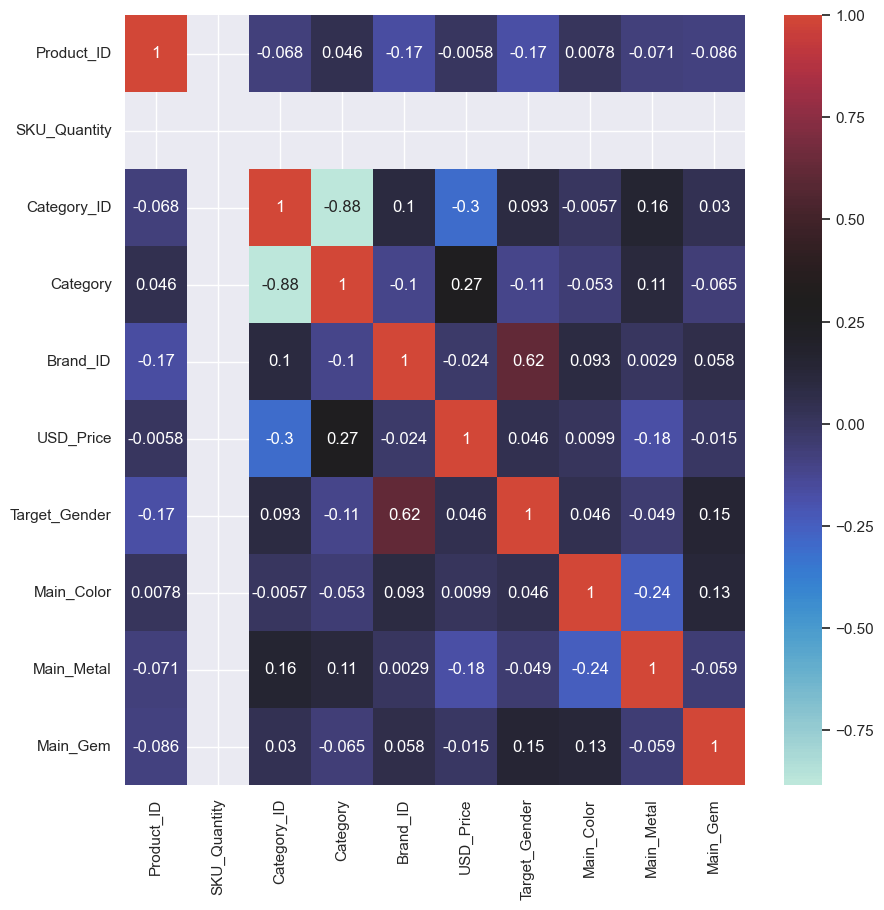

In [61]:
# Correlation heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(correlations, annot=correlations, center=.3)
plt.show()

In [62]:
correlations

,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,USD_Price,Target_Gender,Main_Color,Main_Metal,Main_Gem
Product_ID,1.000000,NaN,-0.067612,0.045974,-0.167567,-0.005826,-0.174900,0.007825,-0.070714,-0.085904
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,-0.067612,NaN,1.000000,-0.883445,0.102341,-0.304429,0.092612,-0.005701,0.159114,0.029780
Category,0.045974,NaN,-0.883445,1.000000,-0.103630,0.274393,-0.112309,-0.053113,0.106521,-0.064541
Brand_ID,-0.167567,NaN,0.102341,-0.103630,1.000000,-0.024357,0.621894,0.093239,0.002909,0.058302
USD_Price,-0.005826,NaN,-0.304429,0.274393,-0.024357,1.000000,0.046484,0.009921,-0.175966,-0.014676
Target_Gender,-0.174900,NaN,0.092612,-0.112309,0.621894,0.046484,1.000000,0.045873,-0.049423,0.148043
Main_Color,0.007825,NaN,-0.005701,-0.053113,0.093239,0.009921,0.045873,1.000000,-0.244682,0.127346
Main_Metal,-0.070714,NaN,0.159114,0.106521,0.002909,-0.175966,-0.049423,-0.244682,1.000000,-0.058735
Main_Gem,-0.085904,NaN,0.029780,-0.064541,0.058302,-0.014676,0.148043,0.127346,-0.058735,1.000000


In [63]:
# Set correlation limits
lower_corr_limits = .2
upper_corr_limits = 1.

In [64]:
correlated_columns = {
    column: correlations[(correlations[column] > lower_corr_limits) & (upper_corr_limits > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [65]:
correlated_columns

{'Product_ID': [],
 'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['USD_Price'],
 'Brand_ID': ['Target_Gender'],
 'USD_Price': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

In [66]:
num_correlated_columns = {k: len(v) for k, v in correlated_columns.items()}

In [67]:
num_correlated_columns

{'Product_ID': 0,
 'SKU_Quantity': 0,
 'Category_ID': 0,
 'Category': 1,
 'Brand_ID': 1,
 'USD_Price': 1,
 'Target_Gender': 1,
 'Main_Color': 0,
 'Main_Metal': 0,
 'Main_Gem': 0}

From the correlation analysis above, it is obvious that most of the features exhibit low correlations with one another and with the target variable itself. This may be taken as a mix of good and bad news.

The good news is that there is little colinearity among the features. This is good for feature independence, which might imply that each variable encodes information that might be relatively orthogonal to the information encoded within other variables. The bad news is, that any model trained in these features might have a difficult time learning anything from the data, as the target variable has little correlation with the independent variables.


#### 2.2. Data Implications

Implied by our findings above, we can say the following:

1. ___Missing values and outliers___: There are a lot of missing values in the dataset. This may be fixed either by value imputation of missingness encoding. As regards outliers, there are quite a lot also. These can be filtered out.

2. ___Data corruption___: Some variables, (e.g., _jewelry_category_) contain corrupt values.

3. ___Rare values___: Some features have some values that occur rarely. A prime instance of this is the _Target_Gender_ column, where the _male_ gender is rarely represented. Sometimes, these are data issues. Other times, like in this case, this can be a true reflection of the distribution from which the data is generated.

4. ___Low cardinality or feature invariance___: The _SKU_Quantity_ feature only has one unique value (e.g., 1). This feature provideds no new information.

5. ___Target skew___: The target variable is highly right-skewed. This can present an issue during training.

6. ___Correlation___: For the most part, the features exhibit low multicollinearity, hence ensuring feature independence. However, the target variable exhibits a low correlation with the independent variables.


---

<div><h3>03. Data Preparation</h3></div>

Based on the *__Data Implications__* discovered prior, the following steps will be experimented upon for the data preparation stage.

1. __Missing Values__: The missing values will be treated via an algorithmic method, ___SimpleImputer___.

2. __Feature Encoding__: The categorical features will be encoded.

3. __Redundant Features__: Certain features will be eliminated for a number of reasons. These are:
   1. _SKU_Quantity_: Feature invariance
   
   2. _Order_ID_: Simple identifier; has no real-world influence on jewelry price.

   3. _Product_ID_: Same with _Order_ID_.

   4. _Order_Datetime_: Avoid data leakage; would not be available in real-world.

4. __Target Skew__: The target variabloe is strongly right-skewed. This can be an issue when learning a mapping from the data space to the label space. Thiis issue will be fixed using the ___TransformedTargetRegressor___ utility.

___NOTE___:
Most of the data preparation steps will be carried out via the use of ___Pipeline___ class from _Sci-kit learn_. The Pipeline object allows us to chain transformers and estimators sequentially for use as one composite object.

<div align="center"><h3>3.1. Enter Data Preparation Code Here</h3></div>


In [73]:
!pip install catboost

In [74]:
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor

from catboost import CatBoostRegressor

from sklearn.base import BaseEstimator, TransformerMixin

In [75]:
# Columns to drop
to_drop = [
    "SKU_Quantity",
    "Order_ID",
    "Product_ID",
    "Order_Datetime",
    "User_ID",
    "Category_ID"

]

In [76]:
data.drop(labels = to_drop, axis=1, inplace=True)

In [77]:
data.head()

,Category,Brand_ID,USD_Price,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [78]:
data.nunique()

Category          218
Brand_ID         2537
USD_Price        3166
Target_Gender       2
Main_Color          5
Main_Metal          3
Main_Gem           30
dtype: int64

In [79]:
data.shape

(93321, 7)

In [80]:
# Extract records with the real categories

del real_categories
data = data.loc[data["Category"].isin(categories), :]

In [81]:
data.nunique()

Category            8
Brand_ID            6
USD_Price        2849
Target_Gender       2
Main_Color          4
Main_Metal          3
Main_Gem           30
dtype: int64

In [82]:
data.head()

,Category,Brand_ID,USD_Price,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN
5,jewelry.earring,0.0,150.55,NaN,red,gold,diamond


In [83]:
data.isnull().sum()

Category             0
Brand_ID          3368
USD_Price            0
Target_Gender    34373
Main_Color        1875
Main_Metal          86
Main_Gem         18084
dtype: int64

In [84]:
# Extract features and labels
X, y = data.drop(labels = ["USD_Price"], axis=1), data['USD_Price']

In [85]:
# Column indexes
columns = X.columns.tolist()
column_indexes = [i for i in range(len(X.columns))]

In [86]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

---

<div><h3>04. Data Modelling</h3></div>

With the data well-prepared now, the modeling can begin. A number of learning algorithms will be tested. They are:

1. ___Linear Regression___,
2. ___Extremely Random Forest (ExtraTrees)___,
3. ___Adaptive Boosting (AdaBoost)___, and
4. ___Catboost___.

#### 4.1. Modelling

In [91]:
# Categorical columns
categorical_columns = ["Category", "Target_Gender", "Main_Color", "Main_Gem", "Main_Metal"]
categorical_columns_index = [columns.index(c) for c in categorical_columns]

In [92]:
categorical_columns_index

[0, 2, 3, 5, 4]

Here, we will instantiate a data transformation pipeline. We will attempt to do the following:

1. Input missing values (___SimpleImputer___)
2. Encode categorical variables. This can be done via ___OrdinalEncoder___ or ___OneHotEncoder___. The logic behind the final choice will be discussed below.

These transformations discussed are going to be applied optionally. Some models like __Catboost__ do not need any value imputation technique from the user, as they have their internal mechanism for that. Models like linear regression will require it, however. The same idea applies to the process of encoding the categorical variables.

For models like __Catboost__, all we need to do is ensure that these categorical variables are represented as numbers. They can then be handled internally [[CatBoost Docs](https://catboost.ai/en/docs/features/categorical-features)]. For other models like __linear regression__, not only do these variables have to be represented as numbers, but they have to be one-hot encoded to prevent the model from treating them as regular continuous variables.

In [94]:
def pipeline(model, fill_missing = True, set_categorical = True, use_label_encoder = False):
    first_encoder = ColumnTransformer(
        transformers = [
            ("imputer", SimpleImputer(strategy = "most_frequent"), column_indexes),
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    second_encoder = ColumnTransformer(
        transformers = [
            ("one_hot", OneHotEncoder(), categorical_columns_index),
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    third_encoder = ColumnTransformer(
        transformers = [
            ("label", OrdinalEncoder(), categorical_columns_index),
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    steps = []

    if fill_missing:
        steps.append(("first_encoder", first_encoder))
    if use_label_encoder:
        steps.append(("third_encoder", third_encoder))
    if set_categorical:
        steps.append(("second_encoder", second_encoder))

    steps.append(("model", model))

    model_pipeline = Pipeline(
        steps = steps
    )

    return model_pipeline

In [95]:
# Instantiate mopdel pipelines
cat_pipe = pipeline(
    CatBoostRegressor(loss_function="RMSE", bagging_temperature=.4, iterations=10000, learning_rate=0.1, one_hot_max_size=2),
    fill_missing=False, set_categorical = False, use_label_encoder = True
)

linear_pipe = pipeline(
    LinearRegression(),
    fill_missing=True, set_categorical =True, use_label_encoder = False
)

extra_pipe = pipeline(
    ExtraTreesRegressor(criterion="friedman_mse", n_estimators = 1000, bootstrap=True),
    fill_missing=True, set_categorical =True, use_label_encoder = False
)

ada_pipe = pipeline(
    AdaBoostRegressor(loss="exponential", n_estimators = 1000, learning_rate=.01),
    fill_missing=True, set_categorical =True, use_label_encoder = False
)

In [96]:
# Transform target for all model pipelines
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = "box-cox"))
linear_pipe = TransformedTargetRegressor(regressor = linear_pipe, transformer = PowerTransformer(method = "box-cox"))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = "box-cox"))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = "box-cox"))

In [97]:
cat_pipe.fit(X_train, y_train)

0:	learn: 0.9566459	total: 168ms	remaining: 27m 56s
1:	learn: 0.9208793	total: 177ms	remaining: 14m 45s
2:	learn: 0.8930995	total: 183ms	remaining: 10m 11s
3:	learn: 0.8659360	total: 190ms	remaining: 7m 53s
4:	learn: 0.8459906	total: 195ms	remaining: 6m 30s
5:	learn: 0.8294126	total: 201ms	remaining: 5m 34s
6:	learn: 0.8124553	total: 207ms	remaining: 4m 56s
7:	learn: 0.7973382	total: 214ms	remaining: 4m 26s
8:	learn: 0.7865281	total: 220ms	remaining: 4m 3s
9:	learn: 0.7767989	total: 226ms	remaining: 3m 46s
10:	learn: 0.7684968	total: 232ms	remaining: 3m 31s
11:	learn: 0.7597648	total: 239ms	remaining: 3m 18s
12:	learn: 0.7534756	total: 245ms	remaining: 3m 8s
13:	learn: 0.7478924	total: 251ms	remaining: 2m 58s
14:	learn: 0.7430314	total: 256ms	remaining: 2m 50s
15:	learn: 0.7363634	total: 262ms	remaining: 2m 43s
16:	learn: 0.7316242	total: 268ms	remaining: 2m 37s
17:	learn: 0.7263678	total: 274ms	remaining: 2m 32s
18:	learn: 0.7232753	total: 280ms	remaining: 2m 27s
19:	learn: 0.7189202	

TransformedTargetRegressor(regressor=Pipeline(steps=[('third_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('label',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        5,
                                                                                        4])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x0000027E386F9610>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [98]:
linear_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        5,
                                                                                        4])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [99]:
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        5,
                                                                                        4])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [100]:
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        5,
                                                                                        4])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

<div align="center"><h3>4.1. Enter Data Modelling Code Here</h3></div>

---

<div><h3>05. Model Evaluation</h3></div>

The trained model is in need of evaluation. The main metrics of interest are ___R2___ and ___RMSE___. This is due to the fact that the problem is a regression problem.

<div align="center"><h3>5.1. Enter Model Evaluation Code Here</h3></div>

#### 5.1. Preliminary Evaluation

Here, we evaluate the preliminary models trained prior.

In [107]:
from sklearn.metrics import r2_score, mean_squared_error

In [108]:
def root_mean_squared_error(y_true, y_pred):
    value = np.sqrt(mean_squared_error(y_true, y_pred))
    return value

In [109]:
def generate_model_score(model, data, metric_name, metric):
    X, y = data
    pred = model.predict(X)
    score = metric(y, pred)
    return score

In [110]:
def print_metrics(metric, train_score, test_score, factor=100, suffix="%"):
    print(f"Train {metric} = {factor * train_score: .3f}{suffix}")
    print(f"Test {metric} = {factor * test_score: .3f}{suffix}")
    print(f"Generalization error = {factor * (train_score - test_score): .3f}{suffix}")

    return

In [111]:
def test_model(model, data, metric_name, metric):
    train, test = data

    if isinstance(metric_name, str):
        train_score = generate_model_score(model, train, metric_name, metric)
        test_score = generate_model_score(model, test, metric_name, metric)

        factor = 1 if metric_name.lower() == "rmse" else 100
        suffix = "" if metric_name.lower() == "rmse" else "%"

        print_metrics(metric_name.lower().capitalize(), train_score, test_score, factor = factor, suffix = suffix)
    else:
        for (name, m) in zip(metric_name, metric):
            train_score = generate_model_score(model, train, name, m)
            test_score = generate_model_score(model, test, name, m)

            factor = 1 if name.lower() == "rmse" else 100
            suffix = "" if name.lower() == "rmse" else "%"

            print_metrics(name.lower().capitalize(), train_score, test_score, factor = factor, suffix = suffix)
            print("="*20 + "\n")

    return

In [112]:
# Metrics
metric_name = ["R2", "RMSE",]
metric = [r2_score, root_mean_squared_error,]

In [113]:
# Test Catboost pipeline
test_model(cat_pipe, [[X_train, y_train], [X_test, y_test]], metric_name, metric)

Train R2 =  31.414%
Test R2 =  31.196%
Generalization error =  0.218%

Train Rmse =  366.259
Test Rmse =  388.440
Generalization error = -22.181



In [114]:
# Test linear regression pipeline
test_model(linear_pipe, [[X_train, y_train], [X_test, y_test]], metric_name, metric)

Train R2 =  7.225%
Test R2 =  6.151%
Generalization error =  1.074%

Train Rmse =  425.977
Test Rmse =  453.662
Generalization error = -27.686



In [115]:
# Test ExtraTrees pipeline
test_model(extra_pipe, [[X_train, y_train], [X_test, y_test]], metric_name, metric)

Train R2 =  21.388%
Test R2 =  21.871%
Generalization error = -0.483%

Train Rmse =  392.117
Test Rmse =  413.927
Generalization error = -21.810



In [116]:
# Test AdaBoost pipeline
test_model(ada_pipe, [[X_train, y_train], [X_test, y_test]], metric_name, metric)

Train R2 =  7.532%
Test R2 =  6.872%
Generalization error =  0.659%

Train Rmse =  425.273
Test Rmse =  451.915
Generalization error = -26.642



#### 5.3 Performance Analysis

Due to stochasticity, running the code multiple times will likely give slightly different results. However, on the whole, we can state the following:

1. All the models seem to have limited performance on this dataset.

2. With respect to R2 score magnitude:

   1. Catboost

   2. ExtraTrees

   3. AdaBoost and

   4. Linear regression

4. The Catboost model seems to have the smallest generalization gap based on R2 score. With respect to the RMSE score though, it seems to have a large gap.

It would seem that the Catboost model performs best. As such, further efforts will be focused on it.

#### 5.2. Hyperparametric Tuning

As can be seen from the short model optimization carried out above, the model performancce may be considered to have shown very slight improvement in terms of:
- Metric magnitude, and
- Generalization error.

The consequence of this is that the optimized Random Forest model is of better performance than the original out-of-box Random Forest model.

---

## Set up MLflow

In [123]:
!pip install mlflow

In [124]:
# import the labraries
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [125]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Price_Optimization")

<Experiment: artifact_location='mlflow-artifacts:/463814816100019746', creation_time=1733299977114, experiment_id='463814816100019746', last_update_time=1733299977114, lifecycle_stage='active', name='Price_Optimization', tags={}>

In [126]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def log_model_to_mlflow(model_pipeline, model_name, X_train, y_train, X_test, y_test):
    """Log model, parameters, and metrics to mlflow."""
    with mlflow.start_run(run_name=f"{model_name}_{datetime.now().strftime('%Y%m%d_%H%M%S')}") as run:
        # Get predictions
        train_predictions = model_pipeline.predict(X_train)
        test_predictions = model_pipeline.predict(X_test)

        # Calculate metrics
        metrics = {
            "train_r2": r2_score(y_train, train_predictions),
            "train_rmse": root_mean_squared_error(y_train, train_predictions),
            "test_r2": r2_score(y_test, test_predictions),
            "test_rmse": root_mean_squared_error(y_test, test_predictions)
        }

        # Log metrics
        for metric_name, metric_value in metrics.items():
            mlflow.log_metric(metric_name, metric_value)

        # Log parameters and model
        try:
            model = model_pipeline.regressor.named_steps["model"]  # Access the model within the pipeline
            params = model.get_params()
            mlflow.log_params(params)

            # Log model with signature if available
            signature = infer_signature(X_train, model.predict(X_train))
            mlflow.sklearn.log_model(
                model_pipeline,  # Log the entire pipeline
                artifact_path=f"{model_name}_model",
                signature=signature
            )
        except Exception as e:
            print(f"Warning: Logging model without signature for {model_name}: {e}")
            # Log model without signature if inference fails
            mlflow.sklearn.log_model(
                model_pipeline,  # Log the entire pipeline
                artifact_path=f"{model_name}_model"
            )

        print(f"\nLogged {model_name} model to mlflow")  # Fixed variable name
        print(f"Run ID: {run._info.run_id}")
        #print(f"Run ID: {mlflow.active_run().info.run_id}")  # Access active run ID
        print("\nMetrics:")
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value:.4f}")

# Log each model
models = {
    "Catboost": cat_pipe,
    "Linear Regression": linear_pipe,
    "ExtraTrees": extra_pipe,
    "AdaBoost": ada_pipe
}

# Log all models
for name, model in models.items():
    print(f"\nLogging {name} model to mlflow...")
    try:
        log_model_to_mlflow(model, name, X_train, y_train, X_test, y_test)
    except Exception as e:
        print(f"Error logging {name} model: {e}")




Logging Catboost model to mlflow...


2024/12/04 09:30:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Logged Catboost model to mlflow
Run ID: f1945efe11ae4da0802c90bab6647d47

Metrics:
train_r2: 0.3141
train_rmse: 366.2587
test_r2: 0.3120
test_rmse: 388.4397
🏃 View run Catboost_20241204_093009 at: http://127.0.0.1:5000/#/experiments/463814816100019746/runs/f1945efe11ae4da0802c90bab6647d47
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/463814816100019746

Logging Linear Regression model to mlflow...


2024/12/04 09:30:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Logged Linear Regression model to mlflow
Run ID: ff830778ec044cfbb65f828f6ad1c2a3

Metrics:
train_r2: 0.0723
train_rmse: 425.9768
test_r2: 0.0615
test_rmse: 453.6623
🏃 View run Linear Regression_20241204_093020 at: http://127.0.0.1:5000/#/experiments/463814816100019746/runs/ff830778ec044cfbb65f828f6ad1c2a3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/463814816100019746

Logging ExtraTrees model to mlflow...


2024/12/04 09:30:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Logged ExtraTrees model to mlflow
Run ID: e6ad8f1ba124459a99b0da7f383fc283

Metrics:
train_r2: 0.2139
train_rmse: 392.1169
test_r2: 0.2187
test_rmse: 413.9272
🏃 View run ExtraTrees_20241204_093025 at: http://127.0.0.1:5000/#/experiments/463814816100019746/runs/e6ad8f1ba124459a99b0da7f383fc283
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/463814816100019746

Logging AdaBoost model to mlflow...


2024/12/04 09:32:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Logged AdaBoost model to mlflow
Run ID: 6f89130552514156ab25ede937891d3c

Metrics:
train_r2: 0.0753
train_rmse: 425.2728
test_r2: 0.0687
test_rmse: 451.9151
🏃 View run AdaBoost_20241204_093038 at: http://127.0.0.1:5000/#/experiments/463814816100019746/runs/6f89130552514156ab25ede937891d3c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/463814816100019746


In [ ]:
!mlflow ui

Performance Analysis

R2: Goodness of Fit
CatBoost (Test 𝑅2=0.3120
R2 =0.3120) performs the best, explaining 31.20% of the variance in the target variable on the test data.

ExtraTrees (Test 𝑅2=0.2187 R2=0.2187) comes second, with moderate explanatory power but lags behind CatBoost.

AdaBoost (Test 𝑅2=0.0687 R2 = 0.0687) and Linear Regression (Test 
𝑅2=0.0615 R2=0.0615) perform poorly, explaining less than 7% of the variance in the test data.


2. RMSE: Prediction Error

CatBoost (Test RMSE = 388.4397) has the lowest RMSE, meaning its predictions are closest to the actual values.

ExtraTrees (Test RMSE = 413.927) has a slightly higher RMSE but is better than Linear Regression and AdaBoost.

AdaBoost (Test RMSE = 451.9151) and Linear Regression (Test RMSE = 453.662) perform similarly, with the highest errors.

Best Model for Prediction: CatBoost
Highest R2 and lowest RMSE on both training and testing data.
Best balance between training and test performance.


Based on the provided dataset and the predictive model for jewelry price optimization, here are some recommendations for improving the model

Recommendations for Model Improvement

1. Feature Engineering:
   - Create New Features: Consider creating additional features that may influence price, such as the age of the jewelry, seasonal trends, or market demand indicators.
   
2. Cross-Validation:
   - Implement k-fold cross-validation to ensure that the model's performance is robust and not overly dependent on a specific train-test split.

3. Error Analysis:
   - Analyze the predictions to identify patterns in the errors. This can help in understanding which features are most influential and where the model may be lacking.
